## Survey - SJ and COVID Clean
The data has been provided by Dr. Giti Javidi of University of South Florida

The data can be downloaded from https://s3.amazonaws.com/nilanjans.net/survey/SJandCOVIDClean.csv

### Import all libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('https://s3.amazonaws.com/nilanjans.net/survey/SJandCOVIDClean.csv')

In [3]:
dataset.shape

(233, 87)

In [4]:
dataset.describe()

,Status,Progress,Duration__in_seconds_,Finished,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,...,FeelBF_Scale,MEES_Scale,COVIDAFt_Scale,SJAFt_Scale,Trust_Scale,Loyalty_Scale,Picture,COVIDAdWe,COVIDAdYou,COVIDAdNeu
count,231.000000,231.000000,231.000000,231.000000,0.0,0.0,0.0,0.0,175.000000,175.000000,...,210.000000,217.000000,162.000000,164.000000,174.000000,171.000000,233.000000,58.0,61.0,60.0
mean,0.038961,79.766234,940.320346,0.757576,NaN,NaN,NaN,NaN,36.932832,-91.652922,...,4.150476,4.425280,5.365432,5.235366,5.721264,5.860819,1.545064,2.0,2.0,2.0
std,0.530174,36.006846,1533.706528,0.429480,NaN,NaN,NaN,NaN,6.031267,21.027482,...,1.663289,1.411033,1.061250,1.240806,1.239362,1.146472,1.109863,0.0,0.0,0.0
min,0.000000,3.000000,5.000000,0.000000,NaN,NaN,NaN,NaN,5.550201,-157.858307,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.0,2.0,2.0
25%,0.000000,100.000000,419.500000,1.000000,NaN,NaN,NaN,NaN,33.894653,-101.641598,...,2.800000,3.428571,4.600000,4.600000,5.000000,5.400000,1.000000,2.0,2.0,2.0
50%,0.000000,100.000000,678.000000,1.000000,NaN,NaN,NaN,NaN,37.777100,-85.426201,...,4.000000,4.428571,5.600000,5.400000,6.000000,6.000000,2.000000,2.0,2.0,2.0
75%,0.000000,100.000000,1137.000000,1.000000,NaN,NaN,NaN,NaN,40.730804,-76.996948,...,5.400000,5.428571,6.150000,6.000000,6.500000,6.600000,3.000000,2.0,2.0,2.0
max,8.000000,100.000000,22178.000000,1.000000,NaN,NaN,NaN,NaN,46.251495,3.390305,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,2.0,2.0,2.0


In [5]:
dataset.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,...,FeelBF_Scale,MEES_Scale,COVIDAFt_Scale,SJAFt_Scale,Trust_Scale,Loyalty_Scale,Picture,COVIDAdWe,COVIDAdYou,COVIDAdNeu
0,7/28/20200:01:21,7/28/20200:03:28,1.0,NaN,100.0,126.0,1.0,7/28/20200:03:29,R_3oUdBq8FLQTu0LO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2.0
1,7/28/20200:50:55,7/28/20201:01:33,0.0,67.36.1.214,100.0,638.0,1.0,7/28/20201:01:33,R_USzzdI4Tt1Wywbn,NaN,...,3.4,4.714286,4.2,5.8,7.0,6.2,3,NaN,NaN,2.0
2,7/28/20201:01:35,7/28/20201:08:20,0.0,172.114.111.114,100.0,404.0,1.0,7/28/20201:08:20,R_SNob9WIRYfy8I9j,NaN,...,3.6,2.000000,NaN,4.8,5.5,4.6,1,2.0,NaN,NaN
3,7/28/20201:04:31,7/28/20201:19:51,0.0,77.234.44.190,100.0,920.0,1.0,7/28/20201:19:52,R_bJgMDlPvVxVAxEJ,NaN,...,7.0,7.000000,NaN,5.8,7.0,7.0,3,NaN,NaN,2.0
4,7/28/20201:17:10,7/28/20201:26:25,0.0,104.11.224.126,100.0,555.0,1.0,7/28/20201:26:25,R_1dLJLNh4bFMuXOs,NaN,...,4.4,4.857143,5.4,6.0,6.0,5.8,2,NaN,2.0,NaN


In [6]:
print(dataset.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration__in_seconds_', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'Pro_ID',
       'FeelBF_1', 'FeelBF_2', 'FeelBF_3', 'FeelBF_4', 'FeelBF_5', 'MEES_1',
       'MEES_2', 'MEES_3', 'MEES_4', 'MEES_5', 'MEES_6', 'MEES_7', 'CoB4Intr',
       'COIssue', 'CoRecall', 'CO_Time_First_Click', 'CO_Time_Last_Click',
       'CO_Time_Page_Submit', 'CO_Time_Click_Count', 'QualCov',
       'QualCov_1_TEXT', 'COVID_After_1', 'COVID_After_2', 'COVID_After_3',
       'COVID_After_4', 'COVID_After_5', 'Floyd_Words', 'Issue_SJ',
       'Recall_SJ', 'SJRecall_Code', 'SJ_Timer_First_Click',
       'SJ_Timer_Last_Click', 'SJ_Timer_Page_Submit', 'SJ_Timer_Click_Count',
       'Qual_SJ', 'Qual_SJ_4_TEXT', 'SJ_After_1', 'SJ_After_2', 'SJ_After_3',
       'SJ_After_4', 'SJ_After_5', 'Trust', 'Trust2', 'Lo

In [7]:
#StartDate,EndDate,Status,IPAddress,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,
#RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,Pro_ID,FeelBF_1,FeelBF_2,FeelBF_3,FeelBF_4,FeelBF_5,MEES_1,MEES_2,MEES_3,
#MEES_4,MEES_5,MEES_6,MEES_7,CoB4Intr,COIssue,CoRecall,CO_Time_First_Click,CO_Time_Last_Click,CO_Time_Page_Submit,CO_Time_Click_Count,QualCov,
#QualCov_1_TEXT,COVID_After_1,COVID_After_2,COVID_After_3,COVID_After_4,COVID_After_5,Floyd_Words,Issue_SJ,Recall_SJ,SJRecall_Code,SJ_Timer_First_Click,
#SJ_Timer_Last_Click,SJ_Timer_Page_Submit,SJ_Timer_Click_Count,Qual_SJ,Qual_SJ_4_TEXT,SJ_After_1,SJ_After_2,SJ_After_3,SJ_After_4,SJ_After_5,Trust,Trust2,
#Loyalty_1,Loyalty_2,Loyalty_3,Loyalty_4,Loyalty_5,Industry,Position,Gender,Ethnic,Ethnic_Txt,Age,Income,Politics,Politics_Txt,PROLIFIC_PID,SJ1_Reverse,
#COVID1_Reverse,FeelBF1_Reverse,FeelBF_Scale,MEES_Scale,COVIDAFt_Scale,SJAFt_Scale,Trust_Scale,Loyalty_Scale,Picture,COVIDAdWe,COVIDAdYou,COVIDAdNeu

columns = ['Loyalty_Scale','Trust_Scale','COVIDAFt_Scale','SJAFt_Scale','Picture','COIssue','Issue_SJ','SJRecall_Code','Age','Income','Ethnic','Ethnic_Txt','Politics','Politics_Txt','Position','Industry']

df_subset = dataset[columns]
               
df_subset.head()

,Loyalty_Scale,Trust_Scale,COVIDAFt_Scale,SJAFt_Scale,Picture,COIssue,Issue_SJ,SJRecall_Code,Age,Income,Ethnic,Ethnic_Txt,Politics,Politics_Txt,Position,Industry
0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.2,7.0,4.2,5.8,3,2.0,2.0,NaN,1.0,21.0,6.0,NaN,2.0,NaN,3.0,Education
2,4.6,5.5,NaN,4.8,1,3.0,3.0,NaN,1.0,23.0,4.0,NaN,3.0,NaN,3.0,Buisness
3,7.0,7.0,NaN,5.8,3,3.0,3.0,NaN,1.0,19.0,3.0,NaN,1.0,NaN,4.0,Engineering
4,5.8,6.0,5.4,6.0,2,1.0,3.0,NaN,1.0,19.0,2.0,NaN,2.0,NaN,3.0,GraphicDesign


In [8]:
df_subset.isnull().any()

Loyalty_Scale      True
Trust_Scale        True
COVIDAFt_Scale     True
SJAFt_Scale        True
Picture           False
COIssue            True
Issue_SJ           True
SJRecall_Code      True
Age                True
Income             True
Ethnic             True
Ethnic_Txt         True
Politics           True
Politics_Txt       True
Position           True
Industry           True
dtype: bool

In [9]:
df_subset.fillna(df_subset.mean(), inplace=True)
df_subset.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Loyalty_Scale,Trust_Scale,COVIDAFt_Scale,SJAFt_Scale,Picture,COIssue,Issue_SJ,SJRecall_Code,Age,Income,Ethnic,Ethnic_Txt,Politics,Politics_Txt,Position,Industry
0,5.860819,5.721264,5.365432,5.235366,3,1.679775,2.41954,1.942857,1.87931,20.068966,5.396552,NaN,2.068966,NaN,3.183908,NaN
1,6.200000,7.000000,4.200000,5.800000,3,2.000000,2.00000,1.942857,1.00000,21.000000,6.000000,NaN,2.000000,NaN,3.000000,Education
2,4.600000,5.500000,5.365432,4.800000,1,3.000000,3.00000,1.942857,1.00000,23.000000,4.000000,NaN,3.000000,NaN,3.000000,Buisness
3,7.000000,7.000000,5.365432,5.800000,3,3.000000,3.00000,1.942857,1.00000,19.000000,3.000000,NaN,1.000000,NaN,4.000000,Engineering
4,5.800000,6.000000,5.400000,6.000000,2,1.000000,3.00000,1.942857,1.00000,19.000000,2.000000,NaN,2.000000,NaN,3.000000,GraphicDesign


In [10]:
df_subset.describe()

,Loyalty_Scale,Trust_Scale,COVIDAFt_Scale,SJAFt_Scale,Picture,COIssue,Issue_SJ,SJRecall_Code,Age,Income,Ethnic,Politics,Position
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,5.860819,5.721264,5.365432,5.235366,1.545064,1.679775,2.419540,1.942857,1.879310,20.068966,5.396552,2.068966,3.183908
std,0.981395,1.070231,0.884070,1.040049,1.109863,0.773336,0.720314,0.370727,0.744131,3.010880,1.074063,0.976386,0.900467
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000
25%,5.800000,5.500000,5.000000,4.800000,1.000000,1.000000,2.000000,1.942857,1.000000,19.000000,5.396552,1.000000,3.000000
50%,5.860819,5.721264,5.365432,5.235366,2.000000,1.679775,2.419540,1.942857,1.879310,20.068966,6.000000,2.000000,3.183908
75%,6.400000,6.500000,5.800000,5.800000,3.000000,2.000000,3.000000,1.942857,2.000000,23.000000,6.000000,2.068966,4.000000
max,7.000000,7.000000,7.000000,7.000000,3.000000,3.000000,3.000000,4.000000,4.000000,24.000000,7.000000,5.000000,5.000000


## Exploring the data scatter of Trust_Scale with respect to each of the Independent variables

Variables:

1.Picture

2.COIssue

3.Issue_SJ

4.SJRecall_Code


### Scatter plot Picture Vs Trust_Scale

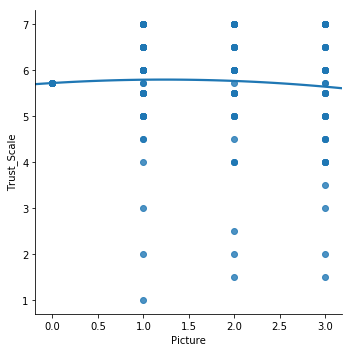

In [11]:
sns.lmplot(x ="Picture", y ="Trust_Scale", data = df_subset, order = 2, ci = None) 

### Scatter plot COIssue Vs Trust_Scale

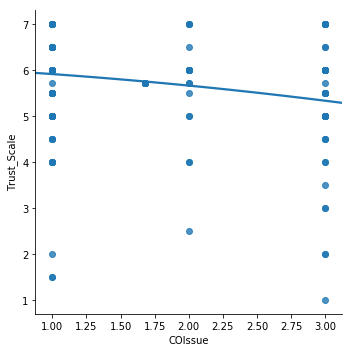

In [12]:
sns.lmplot(x ="COIssue", y ="Trust_Scale", data = df_subset, order = 2, ci = None) 

### Scatter plot Issue_SJ Vs Trust_Scale

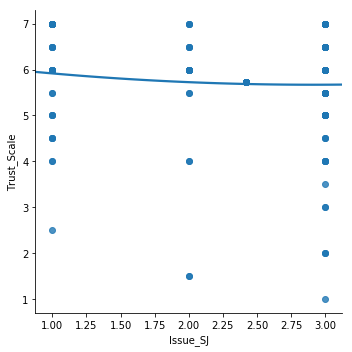

In [13]:
sns.lmplot(x ="Issue_SJ", y ="Trust_Scale", data = df_subset, order = 2, ci = None) 

### Scatter plot SJRecall_Code Vs Trust_Scale

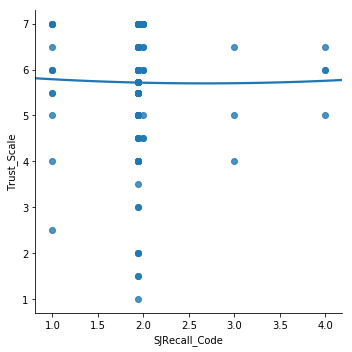

In [14]:
sns.lmplot(x ="SJRecall_Code", y ="Trust_Scale", data = df_subset, order = 2, ci = None) 

### Let us check the average value of the "Trust_Scale"

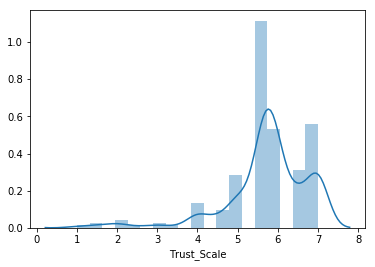

In [15]:
plt.figure()
plt.tight_layout()
sns.distplot(df_subset['Trust_Scale'])

### Let us check the average value of the "Loyalty_Scale"

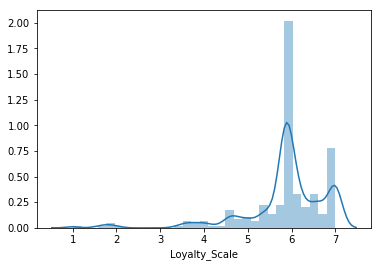

In [16]:
plt.figure()
plt.tight_layout()
sns.distplot(df_subset['Loyalty_Scale'])

### Let us check the average value of the "COVIDAFt_Scale"

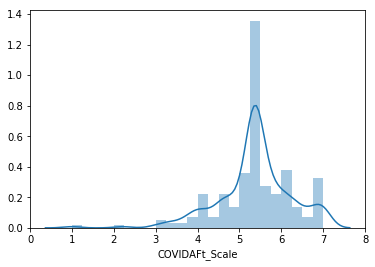

In [17]:
plt.figure()
plt.tight_layout()
sns.distplot(df_subset['COVIDAFt_Scale'])

### Let us check the average value of the "SJAFt_Scale"

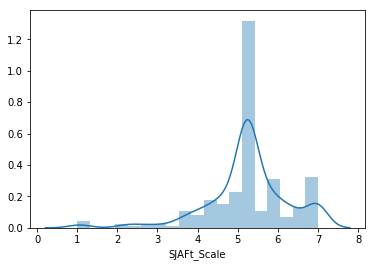

In [18]:
plt.figure()
plt.tight_layout()
sns.distplot(df_subset['SJAFt_Scale'])

### Pairplot of the dependent variables against each other

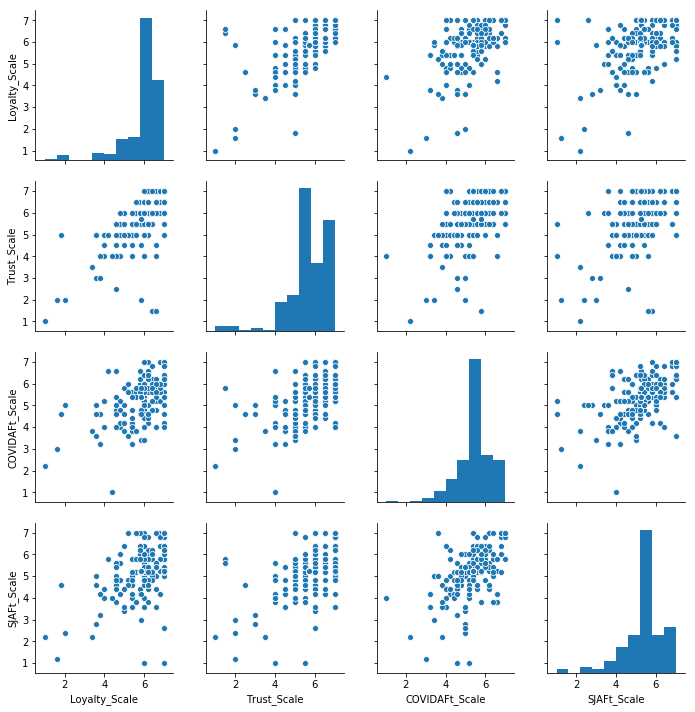

In [19]:
sns.pairplot(df_subset, x_vars=["Loyalty_Scale", "Trust_Scale", "COVIDAFt_Scale", "SJAFt_Scale"],
    y_vars=["Loyalty_Scale", "Trust_Scale", "COVIDAFt_Scale", "SJAFt_Scale"],)

### Pairplot of the dependent variables Vs the independent variables and possible moderators

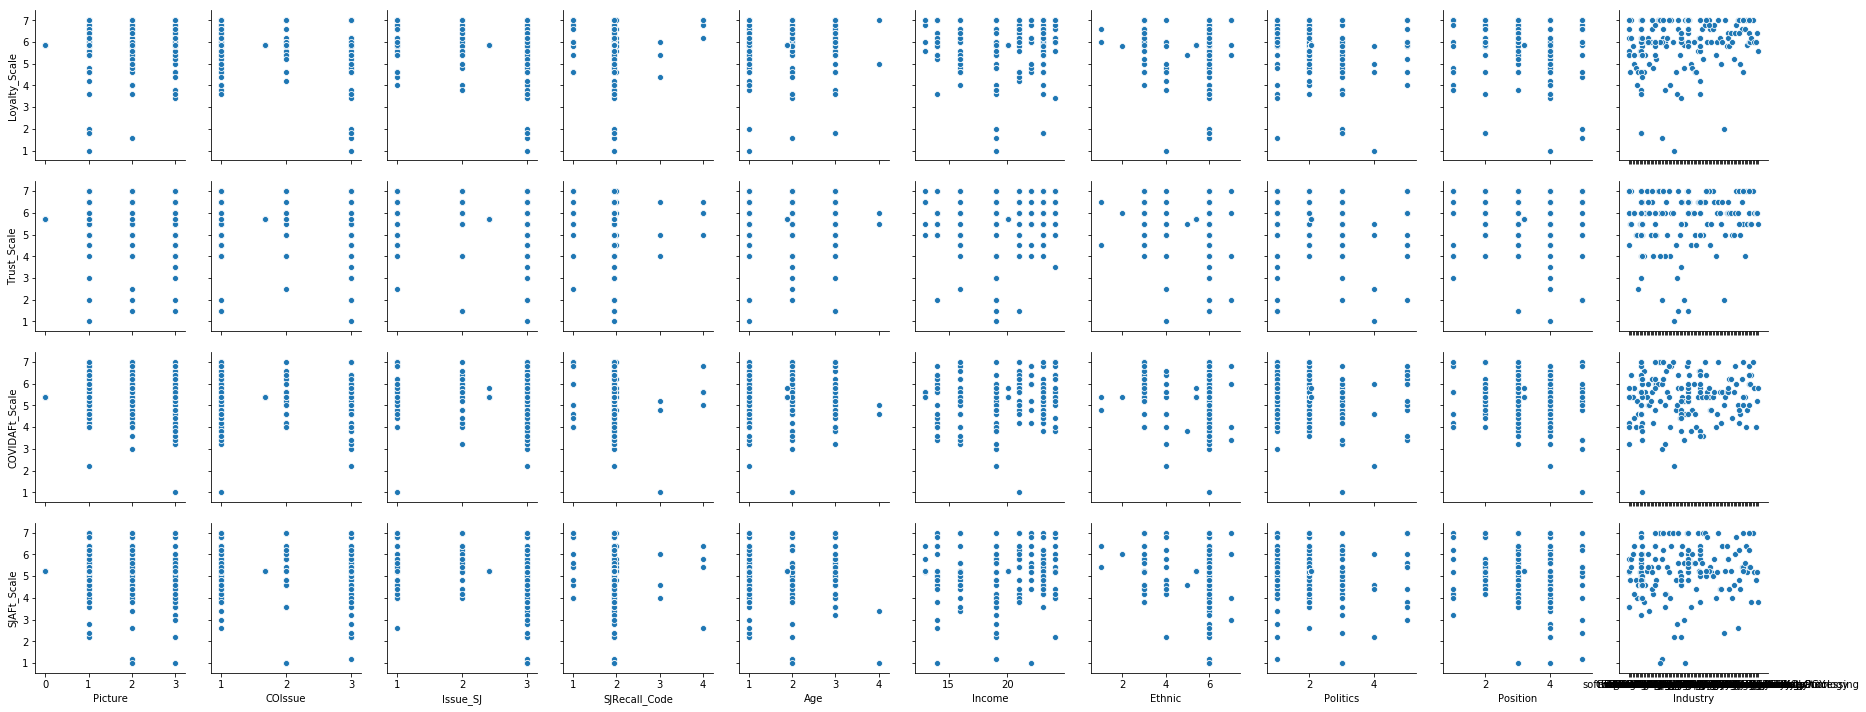

In [20]:
sns.pairplot(df_subset, x_vars=["Picture","COIssue","Issue_SJ","SJRecall_Code","Age","Income","Ethnic","Politics","Position","Industry"],
    y_vars=["Loyalty_Scale", "Trust_Scale", "COVIDAFt_Scale", "SJAFt_Scale"], )

## Multiple Linear Regression

Independent variables: 
1. Picture
2. COIssue
3. Issue_SJ
4. SJRecall_Code
    
Dependent (target) variable: Trust_Scale

## Preparing the Data

### Industry is an ordinal categorical variable so we will need to create the dummy binary variables for this

In [21]:
df_dummies = pd.get_dummies(df_subset, columns=['Industry'])
df_dummies.head()

,Loyalty_Scale,Trust_Scale,COVIDAFt_Scale,SJAFt_Scale,Picture,COIssue,Issue_SJ,SJRecall_Code,Age,Income,...,Industry_manufacturing,Industry_marketing,Industry_medicine,Industry_restaurant,Industry_retailgrocery,Industry_retailindustry,Industry_satellitecommunications,Industry_selfemployed,Industry_softwaredevelopment,Industry_survey
0,5.860819,5.721264,5.365432,5.235366,3,1.679775,2.41954,1.942857,1.87931,20.068966,...,0,0,0,0,0,0,0,0,0,0
1,6.200000,7.000000,4.200000,5.800000,3,2.000000,2.00000,1.942857,1.00000,21.000000,...,0,0,0,0,0,0,0,0,0,0
2,4.600000,5.500000,5.365432,4.800000,1,3.000000,3.00000,1.942857,1.00000,23.000000,...,0,0,0,0,0,0,0,0,0,0
3,7.000000,7.000000,5.365432,5.800000,3,3.000000,3.00000,1.942857,1.00000,19.000000,...,0,0,0,0,0,0,0,0,0,0
4,5.800000,6.000000,5.400000,6.000000,2,1.000000,3.00000,1.942857,1.00000,19.000000,...,0,0,0,0,0,0,0,0,0,0


### On inspecting the Industry data we have decided to discard it while doing regression model
There are total 233 records out of which we have 95 different industries. Hence including different 
dummy variables will not be of any significant advantage

In [22]:
print(dataset.Industry.nunique())
print(dataset.Industry.unique())

95
[nan 'Education' 'Buisness' 'Engineering' 'GraphicDesign' 'manufacturing'
 'FastFood' 'softwaredevelopment' 'Design' 'engineer' 'IT' 'Healthcare'
 'healthcare' 'homeshopping' 'Financialservices' 'Technology'
 'TRASPORTATION' 'Consulting' 'Transportation' 'Auditing' 'Manufacturing'
 'Fashion' 'Wholesale' 'medicine' 'banking' 'informationtechnology'
 'Marketing' 'entertainment' 'informationtechonology' 'itmanager'
 'Informationtechnology' 'Art' 'HigherEducation' 'Bank' 'Food'
 'retailgrocery' 'hospitality' 'MarketingandSales' 'animalcare'
 'marketing' 'Administration' 'FoodService'
 'AdministrationClericalEducation' 'Scienceandtechnology'
 'InformationTechnology' 'Homemaker' 'PersonalServices' 'Tech'
 'satellitecommunications' 'Transcription' 'selfemployed' 'Retailusedto'
 'Informationprocessing' 'Retail' 'ImportionTechnology' 'Petretail'
 'Programmingcompany' 'Construction' 'Audioproduction' 'Hospital'
 'EngineeringmanagentandIT' 'Onlineretail' 'InformationTchnology' 'survey'
 'resta

### Regression model (Target Variable : Trust_Scale)

In [23]:
#X = df_dummies[['Picture','COIssue','Issue_SJ','SJRecall_Code','Age','Income','Ethnic','Politics','Position',
 #              'Industry_marketing','Industry_medicine','Industry_restaurant','Industry_retailgrocery',
  #             'Industry_retailindustry','Industry_satellitecommunications','Industry_selfemployed','Industry_softwaredevelopment','Industry_survey']]

X = df_dummies[['Picture','COIssue','Issue_SJ','SJRecall_Code','Age','Income','Ethnic','Politics','Position']]
y = df_dummies['Trust_Scale']

### We divide training and test data in 70% / 30%

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training the Algorithm

In [25]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Picture,-0.078322
COIssue,-0.219313
Issue_SJ,-0.122381
SJRecall_Code,0.022461
Age,-0.279570
Income,0.062494
Ethnic,0.038364
Politics,-0.287119
Position,-0.227941


In [27]:
intercept = regressor.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6.819393833978441


### So we can write our regression model as:

Y (Trust_Scale) = 6.819393833978441 - 0.078322 * Picture - 0.219313 * COIssue - 0.122381 * Issue_SJ + 0.022461 * SJRecall_Code - 0.279570 * Age + 0.062494 * Income + 0.038364 * Ethnic - 0.287119 * Politics - 0.227941 * Position

### Making Predictions

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_small = df.head(25)
df_small

,Actual,Predicted
220,5.721264,5.814572
145,7.000000,4.984065
173,6.500000,5.433466
189,5.721264,5.814572
136,7.000000,5.656464
130,7.000000,5.902819
204,5.721264,5.814572
170,6.000000,5.618430
90,7.000000,5.443623
158,7.000000,5.716526


### Now we plot the comparison of Actual and Predicted values

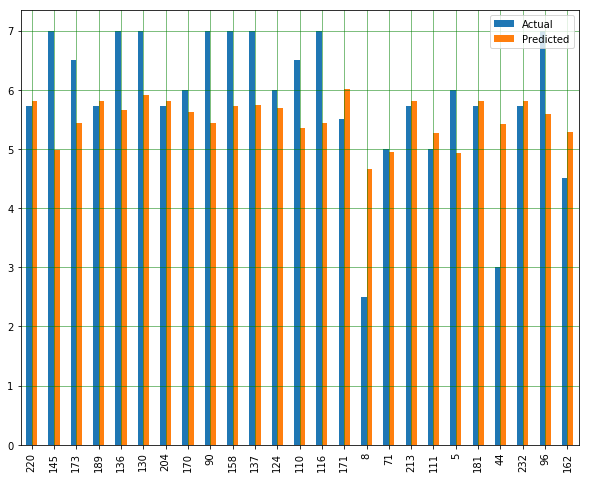

In [30]:
df_small.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. 

We do this by finding the values for MAE, MSE and RMSE

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.7822656742457954
Mean Squared Error: 1.1874189232103485
Root Mean Squared Error: 1.089687534667782


### Regression model

In [32]:
def regression_model(target_variable):
    y = df_dummies[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
    print()
    print('Coefficient values:')
    print(coeff_df)
    intercept = regressor.intercept_
    print()
    print("The intercept for our model is {}".format(intercept))
    y_pred = regressor.predict(X_test)
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_small = df.head(25)
    print()
    print('Actual Vs Predicted values:')
    print(df_small)
    df_small.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    print()
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Regression model (Target Variable : Loyalty_Scale)


Coefficient values:
               Coefficient
Picture           0.034198
COIssue          -0.324644
Issue_SJ         -0.167206
SJRecall_Code    -0.093515
Age              -0.126985
Income            0.005864
Ethnic            0.006063
Politics         -0.259809
Position         -0.145153

The intercept for our model is 8.01112889005979

Actual Vs Predicted values:
       Actual  Predicted
220  5.860819   5.791615
145  7.000000   5.261156
173  6.600000   5.933142
189  5.860819   5.791615
136  7.000000   5.789993
130  6.800000   6.092001
204  5.860819   5.791615
170  6.400000   6.107545
90   6.600000   5.910488
158  7.000000   5.557552
137  7.000000   5.576303
124  5.800000   5.696657
110  6.000000   5.632714
116  6.600000   5.910488
171  5.600000   6.130841
8    4.600000   5.413767
71   4.600000   5.164086
213  5.860819   5.791615
111  1.800000   5.108643
5    5.000000   5.064863
181  5.860819   5.791615
44   3.600000   5.441487
232  5.860819   5.791615
96   6.600000   6.337803
162  4

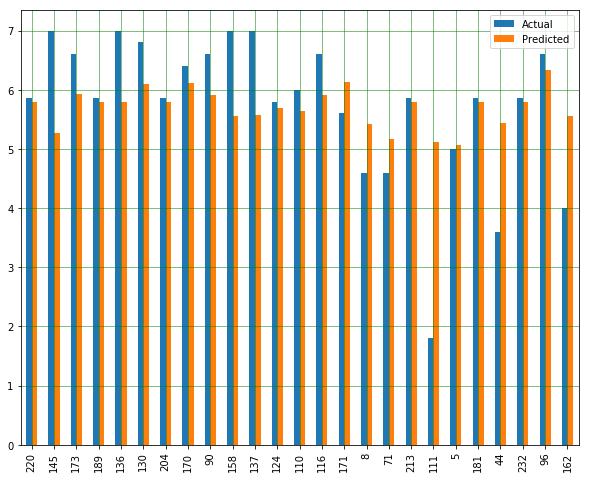


Mean Absolute Error: 0.5911048464703776
Mean Squared Error: 0.7421273698364773
Root Mean Squared Error: 0.8614681478943242


In [33]:
regression_model('Loyalty_Scale')

### Regression model (Target Variable : COVIDAFt_Scale)


Coefficient values:
               Coefficient
Picture          -0.097271
COIssue          -0.117750
Issue_SJ          0.043715
SJRecall_Code    -0.401034
Age              -0.089346
Income            0.046101
Ethnic           -0.128314
Politics         -0.158072
Position         -0.156420

The intercept for our model is 7.135304184124213

Actual Vs Predicted values:
       Actual  Predicted
220  5.365432   5.503903
145  4.000000   5.266084
173  5.600000   4.955329
189  5.365432   5.503903
136  5.365432   5.178940
130  5.200000   5.517263
204  5.365432   5.503903
170  5.200000   5.617146
90   5.400000   5.159974
158  7.000000   5.268245
137  4.200000   5.314881
124  5.800000   5.393734
110  6.000000   5.279148
116  5.400000   5.159974
171  5.800000   5.883442
8    4.600000   5.135650
71   4.600000   4.884000
213  5.365432   5.503903
111  4.600000   5.272131
5    5.800000   5.241248
181  5.365432   5.503903
44   5.000000   5.180376
232  5.365432   5.503903
96   6.200000   5.355973
162  

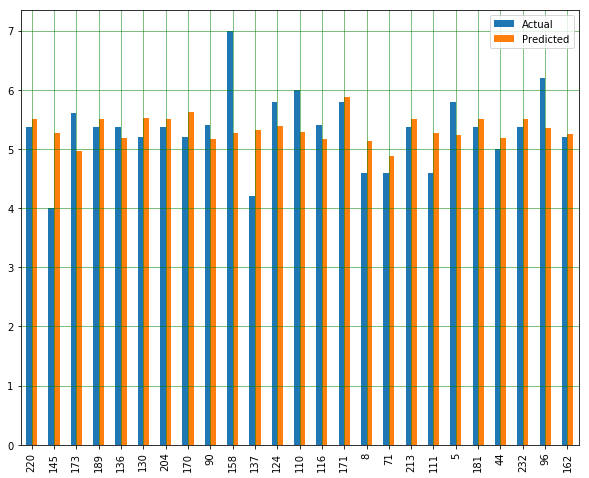


Mean Absolute Error: 0.6013835316913474
Mean Squared Error: 0.6627158486435948
Root Mean Squared Error: 0.8140736137743286


In [34]:
regression_model('COVIDAFt_Scale')

### Regression model (Target Variable : SJAFt_Scale)


Coefficient values:
               Coefficient
Picture          -0.048803
COIssue          -0.220426
Issue_SJ         -0.249650
SJRecall_Code    -0.130689
Age              -0.236629
Income            0.048138
Ethnic           -0.070675
Politics         -0.117513
Position         -0.237550

The intercept for our model is 7.4336101721789145

Actual Vs Predicted values:
       Actual  Predicted
220  5.235366   5.345914
145  6.400000   4.760727
173  5.400000   5.004387
189  5.235366   5.345914
136  5.235366   5.207679
130  4.200000   5.375172
204  5.235366   5.345914
170  5.200000   5.548425
90   5.000000   4.731897
158  7.000000   5.231853
137  6.200000   5.273606
124  5.800000   5.003695
110  5.400000   5.111479
116  5.400000   4.731897
171  3.800000   5.727293
8    4.600000   5.108818
71   5.600000   4.408349
213  5.235366   5.345914
111  4.600000   4.866275
5    6.400000   4.835103
181  5.235366   5.345914
44   2.800000   4.670277
232  5.235366   5.345914
96   7.000000   5.693002
162 

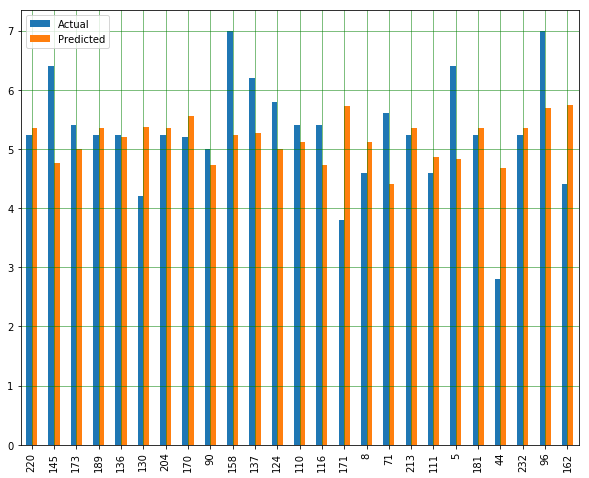


Mean Absolute Error: 0.8169214481666988
Mean Squared Error: 1.1778337845569857
Root Mean Squared Error: 1.085280509618129


In [35]:
regression_model('SJAFt_Scale')

In [36]:
print('DONE')

DONE


## Author

Nilanjan Sen (University of South Florida)

## References

1. https://realpython.com/linear-regression-in-python
2. https://www.geeksforgeeks.org/python-linear-regression-using-sklearn
3. https://benalexkeen.com/linear-regression-in-python-using-scikit-learn
4. https://www.kaggle.com/andyxie/beginner-scikit-learn-linear-regression-tutorial
5. https://stackabuse.com/linear-regression-in-python-with-scikit-learn
6. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
7. https://seaborn.pydata.org/generated/seaborn.pairplot.html
    
